In [ ]:
import pandas as pd
import numpy as np
white_noise = np.random.randn(1000)



It uses the following hypotheses:

H0: The signal samples are independently distributed.

HA: The signal samples are not independently distributed; they exhibit serial correlation.



In [ ]:
?np.random.randn

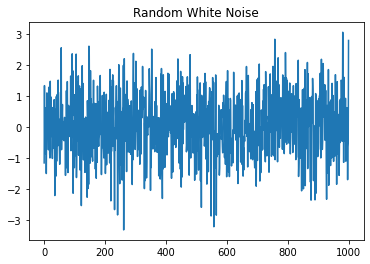

In [ ]:
pd.Series(white_noise).plot(title='Random White Noise')

# Ljung Box test 

White noise ?

In [ ]:
import statsmodels.api as sm

res = sm.stats.acorr_ljungbox(white_noise, lags=[5])
print(f"p-value = {res[1][0]}")


p-value = 0.8442091254623164


donc la p-value >>> 0.05 

On ne peut pas rejeter le H0

donc H0: The processus are independently distributed.

Donc c'est un bruit blanc


In [ ]:
data = sm.datasets.sunspots.load_pandas().data
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


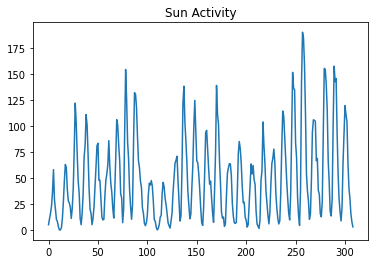

In [ ]:
data.SUNACTIVITY.plot(title='Sun Activity')

In [ ]:
res = sm.stats.acorr_ljungbox(data.SUNACTIVITY, lags=[10])
print(f"p-value = {res[1][0]}")


p-value = 2.381979099896461e-128


donc la p-value <<< 0.05 

On peut rejeter le H0

donc H0: The signal sample are NOT independently distributed.

Donc ce n'est PAS un bruit blanc


In [ ]:
?sm.stats.acorr_ljungbox

Un processus aleatoire $X_t$ centré de variance $\sigma^2$, le coefficient d'autocorrelation k est:

$R(k)= \frac{1}{\sigma^2} \sum _{t=1}^{n-k}X_{t} X_{t+k}$

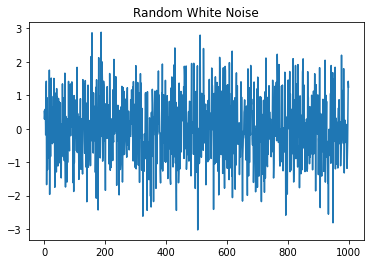

In [ ]:
pd.Series(ts).plot(title='Random White Noise')

$R(k)= \frac{1}{\sigma^2} \sum _{t=}^{n-k}X_{t} X_{t+k}$

In [ ]:
# Modeliser avec un modele ARMA

res = sm.tsa.ARMA(data["SUNACTIVITY"], (1,1)).fit(disp=-1)

# resid = data.SUNACTIVITY - Estimation

sm.stats.acorr_ljungbox(res.resid, lags=[5])


(array([107.86490425]), array([1.15769612e-21]))

donc la p-value <<< 0.05 

On ne peut rejeter le H0

donc H0: The residuals are independently distributed.

Donc les residus sont un bruit blanc


# Bruit blanc non gaussien

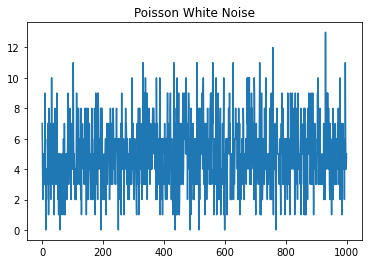

In [ ]:
from numpy.random import poisson
s = np.random.poisson(5, 1000)

pd.Series(s).plot(title='Poisson White Noise')

In [ ]:
res = sm.stats.acorr_ljungbox(s, lags=[5])

In [ ]:
res

(array([2.97203188]), array([0.70429788]))

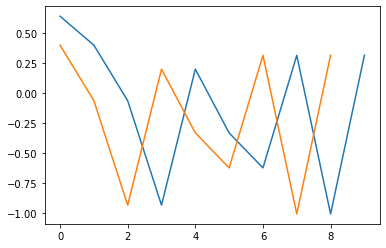

In [ ]:
import pandas as pd
import numpy as np
wn = np.random.randn(10)
pd.Series(wn).plot()
pd.Series(wn[1:]).plot()

In [ ]:
r_1 = wn[0] * wn[1] + wn[1] * wn[2] + wn[2] * wn[3] + wn[3] * wn[4] 
r_2 = wn[0] * wn[2] + wn[1] * wn[3] + wn[2] * wn[4] + wn[3] * wn[5] 

r_2 > 0 
=> r_3 = wn[0] * wn[3] + wn[1] * wn[4] + ....


In [ ]:
r_1 


0.10309502167732504

In [ ]:
r_2

-0.11864042506169842

In [ ]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


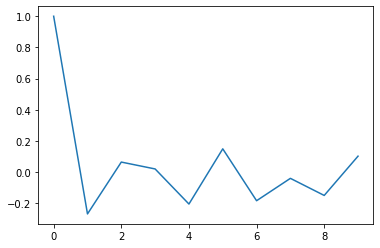

In [ ]:
plt.plot(acf(wn))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


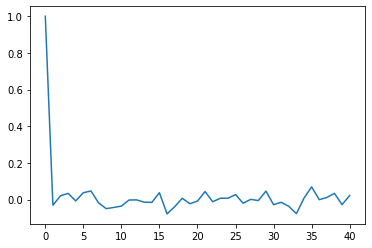

In [ ]:
import pandas as pd
import numpy as np
wn = np.random.randn(1000)
plt.plot(acf(wn))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


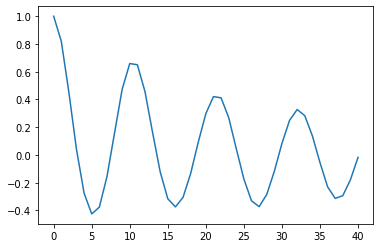

In [ ]:
plt.plot(acf(data.SUNACTIVITY))